In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("C:\\Training\\Phase 1\\Dataset\\data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [16]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [17]:
df = df.drop(columns=['id', 'Unnamed: 32'])

In [18]:
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])

In [19]:
X = df.drop(columns='diagnosis')
y = df['diagnosis']

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [22]:
base_model = DecisionTreeClassifier(max_depth=1, random_state=42)
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_test)

In [25]:
ada_model = AdaBoostClassifier(estimator=base_model, n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

In [26]:
base_acc = accuracy_score(y_test, y_pred_base)
ada_acc = accuracy_score(y_test, y_pred_ada)

In [27]:
base_auc = roc_auc_score(y_test, base_model.predict_proba(X_test)[:, 1])
ada_auc = roc_auc_score(y_test, ada_model.predict_proba(X_test)[:, 1])

In [28]:
results = pd.DataFrame({
    "Model": ["Decision Stump", "AdaBoost"],
    "Accuracy": [base_acc, ada_acc],
    "ROC AUC": [base_auc, ada_auc]
})
print(results)

            Model  Accuracy   ROC AUC
0  Decision Stump  0.894737  0.897150
1        AdaBoost  0.964912  0.992139


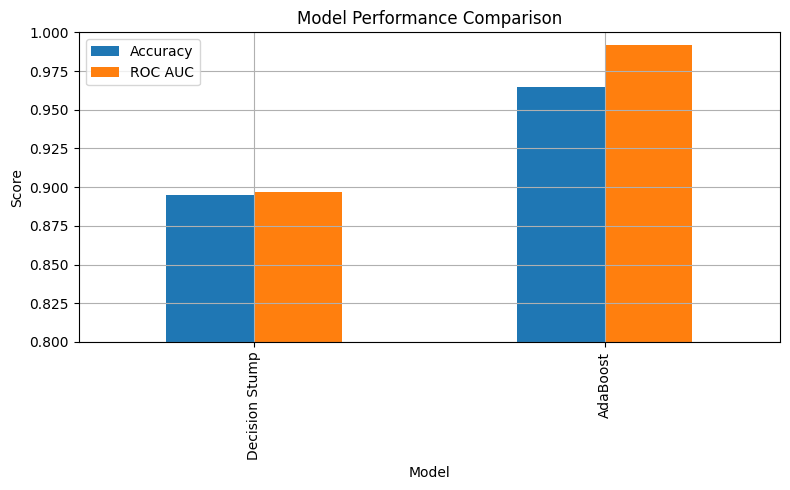

In [29]:
results.set_index("Model")[["Accuracy", "ROC AUC"]].plot(kind='bar', figsize=(8, 5), ylim=(0.8, 1), legend=True)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.grid(True)
plt.tight_layout()